# COGS 108 - Final Project

# Link to Group Video

https://youtu.be/It8KBs4ZYmA

# Permissions

Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

[] YES - make available

[X] NO - keep private

# Overview


For this project we started by trying to ask the question of how rising global temperatures can impact other less obvious factors and the factor we concluded was with suicide rates. 

We began by finding the datasets of suicide rates and the dataset we found had suicide rates on both males and females. Then we found datasets on rising gloabl temperatures and a datasets on natural disasters and the people who went homeless because of them as well. So we decided to incoporate them into one question where we wanted to see if there was some correlation between suicide rates and rising global temperatures and a correlation between rising global temperatures and natural disasters. 

Then we asked if the affect of rising global temperatures causing suicide rates is actually caused by rising global temperature causing more people to go homeless by natural disasters which causes suicide rates or if rising global temperatures causes suicide rates alone.

# Names
- Aung Kyaw
- Ojeen Gammah
- Hyunmin Lim
- Tina Nguyen
- Anthony Yiu

<a id='research_question'></a>
# Research Question

What (if any) are the correlations between rising global temperatures and the rate of natural disasters (counted by the number of people affected and left homeless)?

What (if any) are the correlations between the rate of natural disasters (counted by the number of people affected and left homeless) and the number suicides between men and women?

Based on the two questions above, what (if any) are the correlations between rising global temperatures and the number of suicides between men and women?

Is this solely due to global temperatures or is global temperatures causing more people to be affected by natural disasters thus increasing the number of suicides? How does that differ between men and women?

# Background & Prior Work

We jumpstarted our ideas off of an article relating how rising global temperatures and the rate of natural disasters.

The article(1) shows that as global temperatures begin to rise, it could lead to more hazardous natural disasters putting many people at risk of homelessness. Another article (2) is a study on how homelessness and suicide rates correlate mainly and it mainly shows how homeless people are more likely to commit suicide due to them being at a greater risk of psychological conditions which increases suicide risk factors. 

So we wanted to ask if rising global temperatures could lead to higher suicide rates and if that is solely caused by rising global temperatures or if it is caused by more people being affected by natural disasters which is increased due to rising global temperatures. 


References (include links):
1. https://www.zurich.com/en/knowledge/topics/natural-hazards/how-climate-change-is-making-natural-disasters-worse
2. https://nhchc.org/wp-content/uploads/2019/08/suicide-fact-sheet.pdf

# Hypothesis

We predit that rising global temperatures will result in higher suicide rates amongst men and women and this will be due to the external factor of rising global temperatures causing more people to be affected and left homeless by natural disasters. We believe this is the case because the articles in the background work suggests that rising global temperatures causes natural disasters to increased severity which usually leads to more people being affected by them which would lead them homeless in turn causing more suicides since article(2) states about how homeless populations are more likely to commit suicide.

# Datasets

Dataset Name: Climate Change Dataset

Link to the dataset: https://datacatalog.worldbank.org/search/dataset/0040205

Number of observations: 13512 rows, 28 columns

This dataset shows data from World Development Indicators and Climate Knowledge Portal on climate systems, exposure to climate change effects, resilience, greenhouse gas emissions and energy use.

Dataset Name: Suicide Dataset

Link to the dataset: https://ourworldindata.org/grapher/suicide-death-rates-by-sex

Number of observations: 7596 rows, 6 columns

This dataset shows the number of deaths caused by suicides between the years 1990 to 2019 on both men and women amongst countries around the world.

Dataset Name: Number of people affected by Natural Disasters Dataset

Link to the dataset: https://data.world/hdx/97e007af-4733-4b60-a472-a733f10dedd5/workspace/file?filename=total-affected-natural-disasters-csv-1.csv

Number of observations: 214 rows, 117 columns

This dataset shows the number of people affected by natural disasters in countries worldwide between the years 1967 to 2014

Dataset Name: Number of people made homeless by Natural Disasters Dataset

Link to the dataset: https://data.world/hdx/d2ec211d-faf6-4fb5-a46c-2094dc5830af/workspace/file?filename=homeless-natural-disasters-csv-1.csv

Number of observations: 214 rows, 117 columns

This dataset shows the number of people made homeless by natural disasters in countries worldwide between the years 1967 to 2014

Plan to Combine these datasets:

We plan to clean our datasets by finding the years between all datasets where there is the most viable data and then combine them into one .csv file with the columns being the countries, statistics, and the corresponding years. The rows for the statstics column will be the suicide rate amongst males, females, number of people affected by natural disasters, number of people made homeless by natural disasters and climate changed measured by CO2 levels for each country. 

# Setup

In [91]:
## YOUR CODE HERE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import sklearn
from sklearn import linear_model
climate_url = "https://raw.githubusercontent.com/AnthonyQY/cogs108data/master/climate_change.csv"
homeless_url = "https://raw.githubusercontent.com/AnthonyQY/cogs108data/master/homeless-natural-disasters.csv"
disasters_url = "https://query.data.world/s/u37knx7md7thvlvtmz3mut4n6qv5xa"
suicide_url = "https://raw.githubusercontent.com/AnthonyQY/cogs108data/master/suicide-death-rates-by-sex.csv"

df_climate = pd.read_csv(climate_url)

df_homeless = pd.read_csv(homeless_url, sep=";")

df_disasters = pd.read_csv(disasters_url, sep=";")

df_suicide = pd.read_csv(suicide_url)

# Data Cleaning

Describe your data cleaning steps here.

 Cleaning the climate change dataset below by removing all of the series names that aren't named "Co2 emissions, total (KtCO2)". We then put the series names into a new data column "Statistic" to create a uniform column between all the dataset.

In [92]:
#df_climate_distinct = df_climate.drop_duplicates(subset=["Country code"])
df_climate = df_climate.loc[df_climate['Series name'].isin (['CO2 emissions, total (KtCO2)'])].reset_index(drop=True)
df_climate = df_climate[["Country code","Series name", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008"]]
df_climate.rename(columns = {"Series name": "Statistic"}, inplace=True)
df_climate.rename(columns = {"Country code": "Country Code"}, inplace=True)
df_climate

We cleaned the homeless dataset to get years that we are looking for across all the datasets. Then naming the dataset for what the data accounts for into Statistics. We also limited the years to the specific range that is avaliable in all other datasets for ease when combining.

In [93]:
df_homeless = df_homeless[["Country Code", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008"]]
df_homeless.fillna(0, inplace=True)
df_homeless_distinct = df_homeless.drop_duplicates(subset=["Country Code"])
df_homeless.insert(loc=1,
          column='Statistic',
          value="Number of Homeless")
homeless_distinct_countries = df_homeless_distinct.shape[0]
homeless_distinct_countries
df_homeless

The disaster dataset, we cleaned the dataset years columns to get years we are looking for across all datasets. Then we dropped any duplicates in the dataset. From there we named the Statistics column to what the data accounts for. We also limited the years to the specific range that is avaliable in all other datasets for ease when combining.

In [94]:
df_disasters = df_disasters[["Country Code", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008"]]
df_disasters.fillna(0, inplace=True)
df_disasters_distinct = df_disasters.drop_duplicates(subset=["Country Code"])
df_disasters.insert(loc=1,
          column='Statistic',
          value="Number of People Affected")
disasters_distinct_countries = df_disasters_distinct.shape[0]
disasters_distinct_countries
df_disasters

In the cleaning of the suicide dataset, we first shifted the years in the dataset to their own year columns to match with the years across all our other datasets. From there we changed the gender to seperate "Male" and "Female". We then adjusted the column names and column amount to match across the other datasets with the gender data being moved to a new "Statistic" column. We also limited the years to the specific range that is avaliable in all other datasets for ease when combining.

In [95]:
df_suicide.rename(columns={ "Female suicide rate (age-standardized)" : "Female", "Male suicide rate (age-standardized)" : "Male"}, inplace=True)

df_suicide = df_suicide[["Code","Year", "Female", "Male"]]
df_suicide_male = df_suicide[["Code", "Year", "Male"]]
df_suicide_male = df_suicide_male.rename(columns={"Male" : "Suicides"})

df_suicide_female = df_suicide[["Code", "Year", "Female"]]
df_suicide_female = df_suicide_female.rename(columns={"Female" : "Suicides"})

df_suicide_male = pd.pivot_table(df_suicide_male, index="Code", columns="Year").reset_index()
df_suicide_female = pd.pivot_table(df_suicide_female, index="Code", columns="Year").reset_index()

df_suicide_male.insert(1, "Gender", "Male")
df_suicide_female.insert(1, "Gender", "Female")

df_suicide_combined = pd.concat([df_suicide_male, df_suicide_female])


df_suicide_combined = df_suicide_combined.sort_values("Code")
df_suicide_combined = df_suicide_combined.reset_index(drop=True)
df_suicide_combined.columns = df_suicide_combined.columns.droplevel()

df_suicide_combined.columns.values[0] = "Country Code"
df_suicide_combined.columns.values[1] = "Gender"

df_suicide_combined = df_suicide_combined[["Country Code", "Gender", 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]]
df_suicide_combined.rename(columns = {"Gender":"Statistic", 2000: "2000",2001: "2001",2002: "2002",2003: "2003",2004: "2004",2005: "2005",2006: "2006",2007: "2007",2008: "2008"}, inplace=True)
df_suicide_combined.to_csv("cleaned.csv", encoding="utf-8", index=False)
df_suicide_combined

Combining the Datasets

All the datasets where then combined into one dataset. From there we dropped country codes that did not appear across all the datasets.

In [96]:
df_all_combined = pd.concat([df_suicide_combined, df_disasters,df_climate, df_homeless])
df_all_combined = df_all_combined.sort_values("Country Code")
df_count = df_all_combined["Country Code"].value_counts()
df_count
to_remove = df_count[df_count != 5].index
# Keep rows where the city column is not in to_remove
df_all_combined = df_all_combined[~df_all_combined["Country Code"].isin(to_remove)]

df_all_combined = df_all_combined.replace('..','0')
df_all_combined['2000'] = pd.to_numeric(df_all_combined['2000'])
df_all_combined['2001'] = pd.to_numeric(df_all_combined['2001'])
df_all_combined['2002'] = pd.to_numeric(df_all_combined['2002'])
df_all_combined['2003'] = pd.to_numeric(df_all_combined['2003'])
df_all_combined['2004'] = pd.to_numeric(df_all_combined['2004'])
df_all_combined['2005'] = pd.to_numeric(df_all_combined['2005'])
df_all_combined['2006'] = pd.to_numeric(df_all_combined['2006'])
df_all_combined['2007'] = pd.to_numeric(df_all_combined['2007'])
df_all_combined['2008'] = pd.to_numeric(df_all_combined['2008']) 

df_all_combined

# Data Analysis & Results (EDA)

We created the dataframe 'df_all_combined_nocountry', that drops the country code column from our dataframe. We chose to do this because we are analyzing the global rates, rather than analyzing between the countries.

In [97]:
df_all_combined_nocountry = df_all_combined.drop(columns=["Country Code"])
df_all_combined_nocountry = df_all_combined_nocountry.replace('..','0')
#df_all_combined_nocountry['2000']

df_all_combined_nocountry['2000'] = pd.to_numeric(df_all_combined_nocountry['2000'])
df_all_combined_nocountry['2001'] = pd.to_numeric(df_all_combined_nocountry['2001'])
df_all_combined_nocountry['2002'] = pd.to_numeric(df_all_combined_nocountry['2002'])
df_all_combined_nocountry['2003'] = pd.to_numeric(df_all_combined_nocountry['2003'])
df_all_combined_nocountry['2004'] = pd.to_numeric(df_all_combined_nocountry['2004'])
df_all_combined_nocountry['2005'] = pd.to_numeric(df_all_combined_nocountry['2005'])
df_all_combined_nocountry['2006'] = pd.to_numeric(df_all_combined_nocountry['2006'])
df_all_combined_nocountry['2007'] = pd.to_numeric(df_all_combined_nocountry['2007'])
df_all_combined_nocountry['2008'] = pd.to_numeric(df_all_combined_nocountry['2008']) 
df_all_combined_nocountry  

The dataframe 'df_all_combined_nocountry_grouped', is our dataframe grouped by the 'Statistic'.

In [ ]:
df_all_combined_nocountry_grouped = df_all_combined_nocountry.groupby("Statistic").mean().reset_index()
df_all_combined_nocountry_grouped

Plotted below is the values of each statistic(Global rise in temperature, Suicide rates of Female and Males, Number of homeless, Number of People Affected)

<AxesSubplot: xlabel='Values', ylabel='Statistic'>

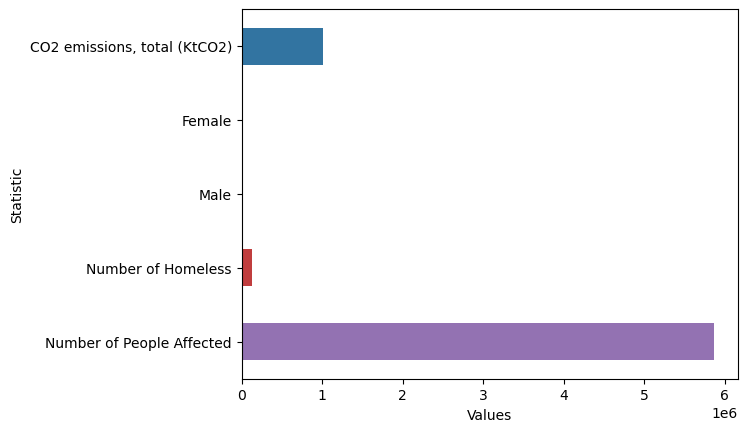

In [ ]:
df_all_combined_nocountry_grouped_flat = df_all_combined_nocountry_grouped.copy()
df_all_combined_nocountry_grouped_flat["Values"] = df_all_combined_nocountry_grouped_flat.iloc[:, 1:].sum(axis=1)
sns.barplot(data=df_all_combined_nocountry_grouped_flat, y="Statistic", x="Values", orient="h", width=0.5)


# Suicide Rates and Carbon Emissions

We created a seperate dataframe 'df_male_suicides', to get the column statistic for the suicide rates of Males.

In [ ]:
df_male_suicides = df_all_combined_nocountry_grouped[df_all_combined_nocountry_grouped["Statistic"] == "Male"]
df_male_suicides = df_male_suicides.drop(columns=["Statistic"]).T.reset_index()
df_male_suicides

Plotted below, is the visual data of the male suicide rates (per 100,000 people) and the years (2000-2008) we are looking at in our analysis. As we can see over the years between 2000 and 2008 the suicide rates amongst men have gone down in both the barplot and line plots.

<AxesSubplot: ylabel='2'>

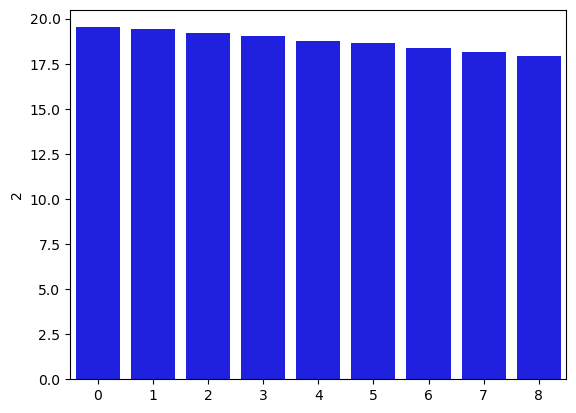

In [ ]:
sns.barplot(data=df_male_suicides, x=df_male_suicides.index, y=df_male_suicides[2], color="b")

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Number Dead per 100,000')]

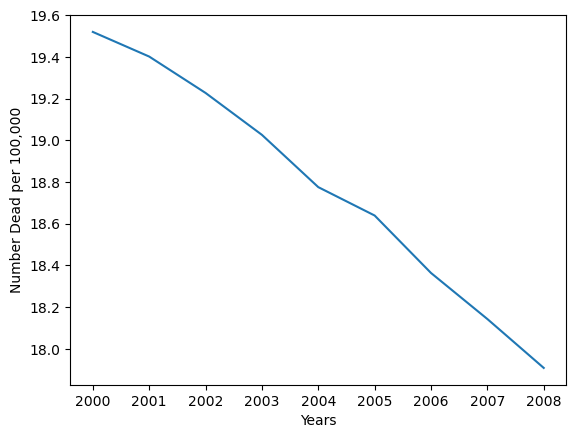

In [ ]:
ax = sns.lineplot(data=df_male_suicides, x=df_male_suicides["index"], y=df_male_suicides[2])
ax.set(xlabel="Years", ylabel="Number Dead per 100,000")

We created a seperate dataframe 'df_female_suicides', to get the column statistic for the suicide rates of Females.

In [ ]:
df_female_suicides = df_all_combined_nocountry_grouped[df_all_combined_nocountry_grouped["Statistic"] == "Female"]
df_female_suicides = df_female_suicides.drop(columns=["Statistic"]).T.reset_index()
df_female_suicides

Plotted below, is the visual data of the females suicide rates (per 100,000 people) and the years (2000-2008) we are looking at in our analysis. As we can see over the years between 2000 and 2008 the suicide rates amongst females have gone down in both barplot and lineplot.

<AxesSubplot: ylabel='1'>

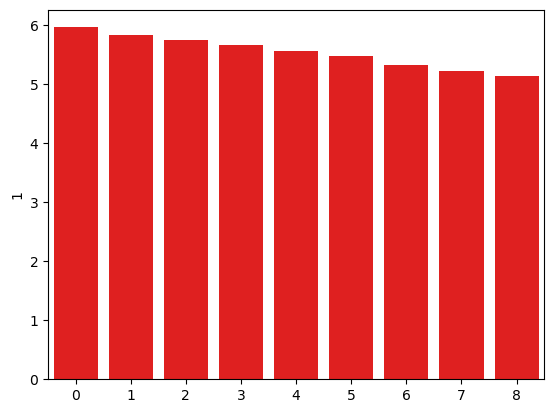

In [ ]:
sns.barplot(data=df_female_suicides, x=df_female_suicides.index, y=df_female_suicides[1], color="r")

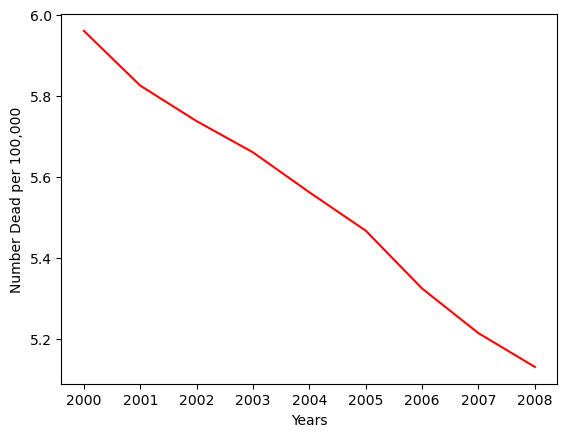

In [ ]:
ax = sns.lineplot(data=df_female_suicides, x=df_female_suicides["index"], y=df_female_suicides[1], color="r")
ax.set(xlabel="Years", ylabel="Number Dead per 100,000")
plt.show()

## Male v. Female Suicides

Plotted below, is the visual data of the male and female suicide rates (per 100,000 people) and the years (2000-2008) we are looking at in our analysis. As we can see over the years between 2000 and 2008 the suicide rates amongst men and women have gone down.

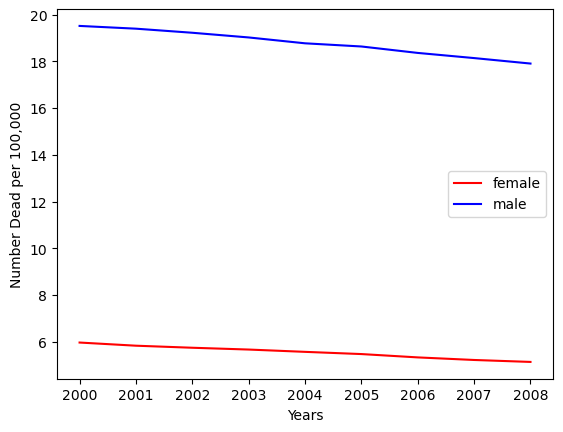

In [ ]:
fig,ax = plt.subplots()
plt.plot(df_female_suicides["index"], df_female_suicides[1], label = "female",color = 'red')
plt.plot(df_male_suicides["index"], df_male_suicides[2], label = "male",color = 'blue')
ax.set(xlabel="Years", ylabel="Number Dead per 100,000")
plt.legend()
plt.show()

We created a seperate dataframe 'df_emissions', to get the column statistic for CO2 emissions, total (KtCO2).

In [ ]:
df_emissions = df_all_combined_nocountry_grouped[df_all_combined_nocountry_grouped["Statistic"] == "CO2 emissions, total (KtCO2)"]
df_emissions = df_emissions.drop(columns=["Statistic"]).T.reset_index()
df_emissions

## Normalize Dataset Values

For the datasets (df_emissions, df_male_suicides, df_female_suicides), we normalized the data so the range across all datasets will be from 0-100.

In [ ]:
df_emissions[0] = 100 * (df_emissions[0] - df_emissions[0].min()) / (df_emissions[0].max() - df_emissions[0].min())
df_emissions

In [ ]:
df_male_suicides[2] = 100 * (df_male_suicides[2] - df_male_suicides[2].min()) / (df_male_suicides[2].max() - df_male_suicides[2].min())
df_female_suicides[1] = 100 * (df_female_suicides[1] - df_female_suicides[1].min()) / (df_female_suicides[1].max() - df_female_suicides[1].min())
df_male_suicides.head(5)

## Comparison

Plotted below, is the visual data of the male and female suicide rates (per 100,000 people) along with the global temperature increase during the years (2000-2008) we are looking at in our analysis. As we can see over the years between 2000 and 2008 the suicide rates amongst men and women have gone down but the global temperature has gone up.

In [ ]:
fig,ax = plt.subplots()
plt.plot(df_female_suicides["index"], df_female_suicides[1], label = "female",color = 'red')
plt.plot(df_male_suicides["index"], df_male_suicides[2], label = "male", color = 'blue')
plt.plot(df_emissions["index"], df_emissions[0], label = "emissions",color = 'green')
ax.set(xlabel="Years", ylabel="Normalized between 0 to 100")
plt.legend()

We created a dataframe 'result', that merges both df_emissions and df_male_suicides to be put into a linear regression model comparing the two.

In [ ]:
result = pd.merge(df_emissions,df_male_suicides)
result.rename({0:"emissions",2:"mSuicides"},axis =1, inplace=True)
result


To begin our analysis we will first plot the relationship between our two variables of interest then we will use linear regression to determine the affects of Co2 emissions for male suicides.

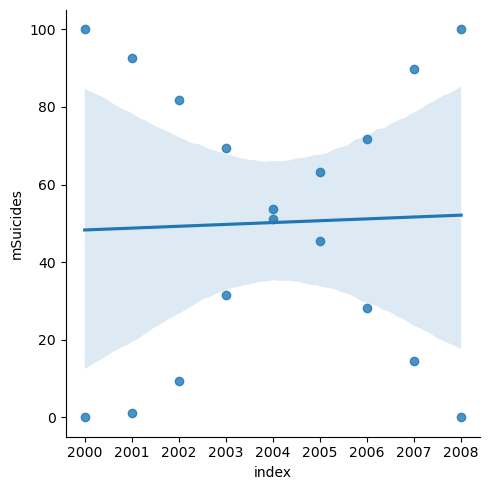

In [ ]:
temp_df = result.copy().melt(id_vars="index", var_name="emissions", value_name="mSuicides")
temp_df["index"] = pd.to_numeric(temp_df["index"])
sns.lmplot(data=temp_df, x="index", y="mSuicides")

In [ ]:
outcome_1, predictors_1 = patsy.dmatrices('emissions ~ mSuicides', result)

mod_1 = sm.OLS(outcome_1, predictors_1)

res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:              emissions   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     439.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.42e-07
Time:                        17:54:57   Log-Likelihood:                -26.267
No. Observations:                   9   AIC:                             56.53
Df Residuals:                       7   BIC:                             56.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    104.3764      3.243     32.186      0.0

We created a dataframe 'result1', that merges both df_emissions and df_female_suicides to be put into a linear regression model comparing the two.

In [ ]:
result1 = pd.merge(df_emissions,df_female_suicides)
result1.rename({0:"emissions",1:"fSuicides"},axis =1, inplace=True)
result1

To begin our analysis we will first plot the relationship between our two variables of interest then we will use linear regression to determine the affects of Co2 emissions for female suicides.

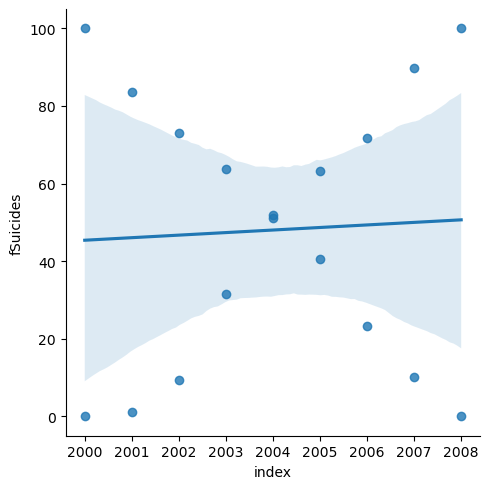

In [ ]:
temp_df = result1.copy().melt(id_vars="index", var_name="emissions", value_name="fSuicides")
temp_df["index"] = pd.to_numeric(temp_df["index"])
sns.lmplot(data=temp_df, x="index", y="fSuicides")

In [ ]:
outcome_2, predictors_2 = patsy.dmatrices('emissions ~ fSuicides', result1)

mod_2 = sm.OLS(outcome_2, predictors_2)

res_2 = mod_2.fit()

print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:              emissions   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     203.6
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.97e-06
Time:                        17:54:58   Log-Likelihood:                -29.644
No. Observations:                   9   AIC:                             63.29
Df Residuals:                       7   BIC:                             63.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.8052      4.538     22.213      0.0

## Conclusions
The approach we used to determine this analysis is to first plot out line graphs to visualize our data's relation to each other. And then we used OLS regression to do a detailed analysis of each relationships to answer our questions above.

As we can see with the first OLS results for men when compared with global temperature increase, we can see that the p-value is 0.000000142 with the slope being -1.0734.

Based on significant level = 0.05, accept the null hypthesis.

As we can see with the second OLS results for female when compared with global temperature increase, we can see that the p-value is 0.00000197 with the slope being -1.0959.

Based on significant level = 0.05, accept the null hypthesis.

Looking at the log-likelihood of the first OLS results are -26.27 and the second OLS results are -29.644. The male suicide rates have a better fit than the female suicides rates against the global temperature rates.

As we can see from both slopes, there is an inverse relationship between male and female suicide rates and rising global temperatures which first disproves our hypothesis. We can also see that the slopes aren't that different so we can also say that there isn't a significant difference in the effects.


# Natural Disasters v. Suicide Rates

We created a seperate dataframe 'df_natural_disasters', to get the column statistic for number of people affected by natural disasters.

In [ ]:
df_natural_disasters = df_all_combined_nocountry_grouped[df_all_combined_nocountry_grouped["Statistic"] == "Number of People Affected"]
df_natural_disasters = df_natural_disasters.drop(columns=["Statistic"]).T.reset_index()
df_natural_disasters

Plotted below is the rate of the number of people affected by natural disasters across the years (2000-2008) we are analyzing for. 


[Text(0.5, 0, 'Years'),
 Text(0, 0.5, 'Number of People Affected by Natural Disasters')]

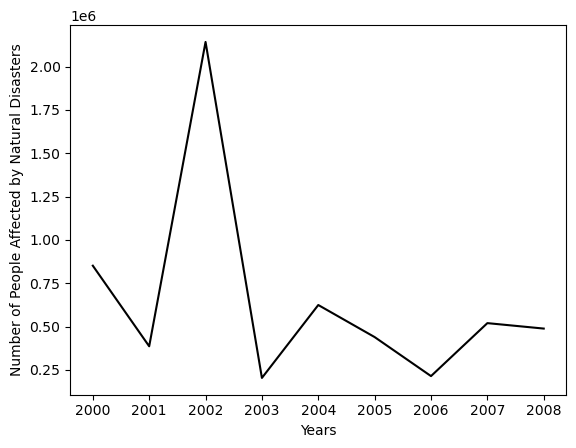

In [ ]:
ax = sns.lineplot(data=df_natural_disasters, x=df_natural_disasters["index"], y=df_natural_disasters[4], color="black")
ax.set(xlabel="Years", ylabel="Number of People Affected by Natural Disasters")

We created a seperate dataframe 'df_homeless', to get the column statistic for number of people left homeless by natural disasters.

In [ ]:
df_homeless = df_all_combined_nocountry_grouped[df_all_combined_nocountry_grouped["Statistic"] == "Number of Homeless"]
df_homeless = df_homeless.drop(columns=["Statistic"]).T.reset_index()
df_homeless

Plotted below is the rate of the number of people left homeless by natural disasters across the years (2000-2008) we are analyzing for.

In [ ]:
ax = sns.lineplot(data=df_homeless, x=df_homeless["index"], y=df_homeless[3], color="black")
ax.set(xlabel="Years", ylabel="Number of People Left Homeless by Natural Disasters")

[Text(0.5, 0, 'Years'),
 Text(0, 0.5, 'Number of People Left Homeless by Natural Disasters')]

We created a seperate dataframe 'df_male_suicides', to get the column statistic for number of male suicides.

In [ ]:
df_male_suicides = df_all_combined_nocountry_grouped[df_all_combined_nocountry_grouped["Statistic"] == "Male"]
df_male_suicides = df_male_suicides.drop(columns=["Statistic"]).T.reset_index()
df_male_suicides

Plotted below, is the visual data of the male suicide rates (per 100,000 people) and the years (2000-2008) we are looking at in our analysis. As we can see over the years between 2000 and 2008 the suicide rates amongst men have gone down.

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Number Dead per 100,000')]

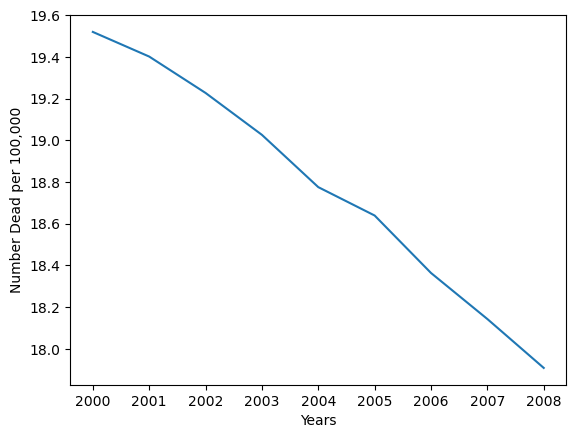

In [ ]:
ax = sns.lineplot(data=df_male_suicides, x=df_male_suicides["index"], y=df_male_suicides[2])
ax.set(xlabel="Years", ylabel="Number Dead per 100,000")

We created a seperate dataframe 'df_female_suicides', to get the column statistic for number of female suicides.

In [ ]:
df_female_suicides = df_all_combined_nocountry_grouped[df_all_combined_nocountry_grouped["Statistic"] == "Female"]
df_female_suicides = df_female_suicides.drop(columns=["Statistic"]).T.reset_index()
df_female_suicides

Plotted below, is the visual data of the female suicide rates (per 100,000 people) and the years (2000-2008) we are looking at in our analysis. As we can see over the years between 2000 and 2008 the suicide rates amongst female have gone down.

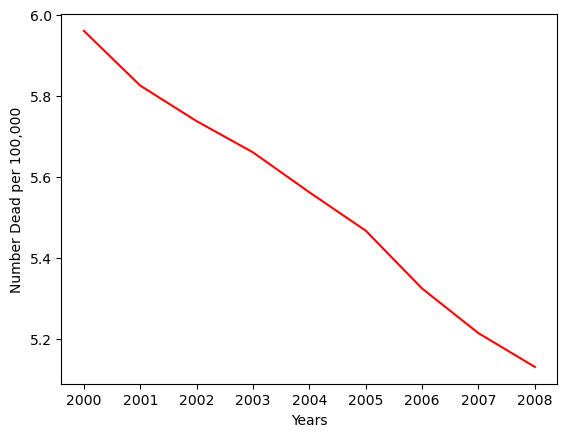

In [ ]:
ax = sns.lineplot(data=df_female_suicides, x=df_female_suicides["index"], y=df_female_suicides[1], color="r")
ax.set(xlabel="Years", ylabel="Number Dead per 100,000")
plt.show()

We created a graph showing the relations between the df_female_suicides, df_male_suicides, df_homeless and df_natural_disasters before we normalized the datasets.

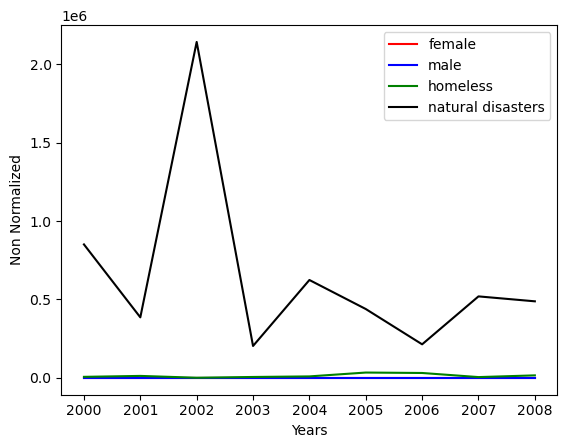

In [ ]:
fig,ax = plt.subplots()
plt.plot(df_female_suicides["index"], df_female_suicides[1], label = "female",color = 'red')
plt.plot(df_male_suicides["index"], df_male_suicides[2], label = "male",color = 'blue')
plt.plot(df_homeless["index"], df_homeless[3], label = "homeless",color = 'green')
plt.plot(df_natural_disasters["index"], df_natural_disasters[4], label = "natural disasters",color = 'black')
ax.set(xlabel="Years", ylabel="Non Normalized")
plt.legend()

# Normalize Datasets

For the datasets (df_homeless, df_natural_disasters, df_male_suicides, df_female_suicides), we normalized the data so the range across all datasets will be from 0-100.

In [ ]:
df_homeless[3] = 100 * (df_homeless[3] - df_homeless[3].min()) / (df_homeless[3].max() - df_homeless[3].min())
df_natural_disasters[4] = 100 * (df_natural_disasters[4] - df_natural_disasters[4].min()) / (df_natural_disasters[4].max() - df_natural_disasters[4].min())
df_homeless

In [ ]:
df_male_suicides[2] = 100 * (df_male_suicides[2] - df_male_suicides[2].min()) / (df_male_suicides[2].max() - df_male_suicides[2].min())
df_female_suicides[1] = 100 * (df_female_suicides[1] - df_female_suicides[1].min()) / (df_female_suicides[1].max() - df_female_suicides[1].min())
df_male_suicides.head(5)

## Comparison

We created a graph showing the relations between the df_female_suicides, df_male_suicides, df_homeless and df_natural_disasters after we normalized the datasets to accurately see the correlation between the dataframes.

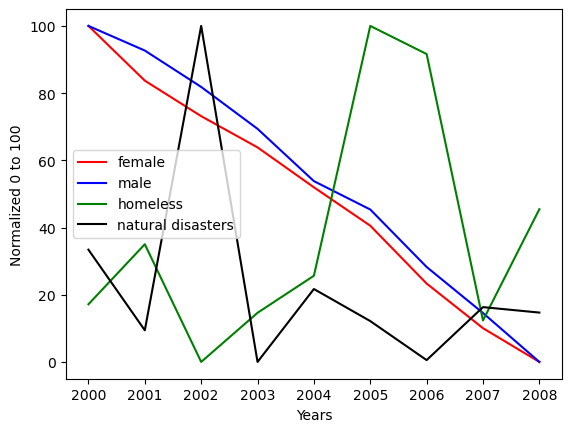

In [ ]:
fig,ax1 = plt.subplots()
plt.plot(df_female_suicides["index"], df_female_suicides[1], label = "female",color = 'red')
plt.plot(df_male_suicides["index"], df_male_suicides[2], label = "male",color = 'blue')
plt.plot(df_homeless["index"], df_homeless[3], label = "homeless",color = 'green')
plt.plot(df_natural_disasters["index"], df_natural_disasters[4], label = "natural disasters",color = 'black')
ax1.set(xlabel="Years", ylabel="Normalized 0 to 100")
plt.legend()

We created a dataframe 'result3', that merges both df_homeless and df_male_suicides to be put into a linear regression model comparing the two.

In [ ]:
result3 = pd.merge(df_homeless,df_male_suicides)
result3.rename({3:"homeless",2:"mSuicides"},axis =1, inplace=True)
result3

To begin our analysis we will first plot the relationship between our two variables of interest then we will use linear regression to determine the affects of people left homeless by natural disasters for male suicides.

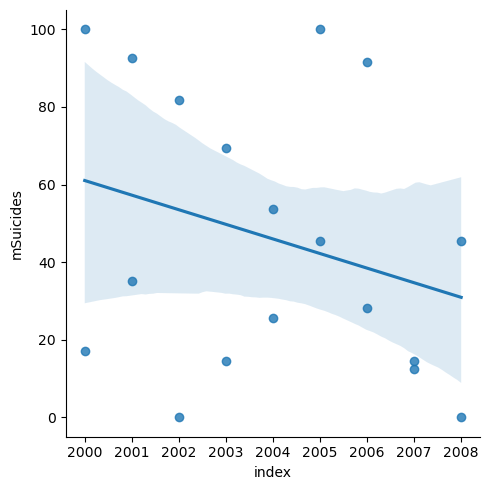

In [ ]:
temp_df = result3.copy().melt(id_vars="index", var_name="homeless", value_name="mSuicides")
temp_df["index"] = pd.to_numeric(temp_df["index"])
sns.lmplot(data=temp_df, x="index", y="mSuicides")

The linear regression model below compares number of people left homeless by natural disasters and male suicide rates.

In [ ]:
outcome_3, predictors_3 = patsy.dmatrices('homeless ~ mSuicides', result3)

mod_3 = sm.OLS(outcome_3, predictors_3)

res_3 = mod_3.fit()

print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:               homeless   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.199
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.310
Time:                        17:55:06   Log-Likelihood:                -43.627
No. Observations:                   9   AIC:                             91.25
Df Residuals:                       7   BIC:                             91.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.8310     22.316      2.636      0.0

We created a dataframe 'result4', that merges both df_homeless and df_female_suicides to be put into a linear regression model comparing the two.

In [ ]:
result4 = pd.merge(df_homeless,df_female_suicides)
result4.rename({3:"homeless",1:"fSuicides"},axis =1, inplace=True)
result4

To begin our analysis we will first plot the relationship between our two variables of interest then we will use linear regression to determine the affects of people left homeless by natural disasters for female suicides.

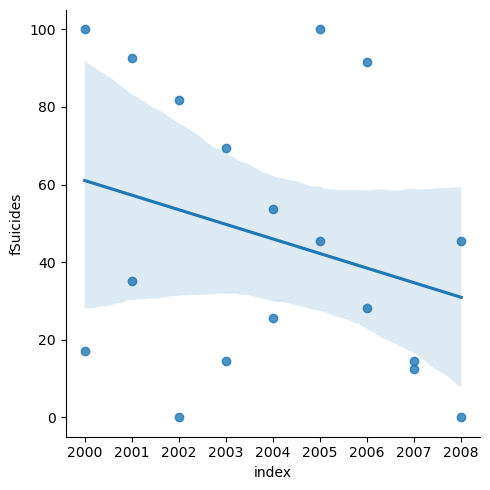

In [ ]:
temp_df = result3.copy().melt(id_vars="index", var_name="homeless", value_name="fSuicides")
temp_df["index"] = pd.to_numeric(temp_df["index"])
sns.lmplot(data=temp_df, x="index", y="fSuicides")

The linear regression model below compares number of people left homeless by natural disasters and female suicide rates.

In [ ]:
outcome_4, predictors_4 = patsy.dmatrices('homeless ~ fSuicides', result4)

mod_4 = sm.OLS(outcome_4, predictors_4)

res_4 = mod_4.fit()

print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:               homeless   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.238
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.303
Time:                        17:55:08   Log-Likelihood:                -43.606
No. Observations:                   9   AIC:                             91.21
Df Residuals:                       7   BIC:                             91.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.9925     21.409      2.709      0.0

## Conclusion
The approach we used to determine this analysis is to first plot out line graphs to visualize our data's relation to each other. And then we used OLS regression to do a detailed analysis of each relationships to answer our questions above.

As we can see with the first OLS results for men when compared with number of people left homeless after natural disasters, we can see that the p-value is 0.310 with the slope being -0.38.

Based on significant level = 0.05, accept the null hypthesis.

As we can see with the second OLS results for female when compared with number of people left homeless after natural disaster, we can see that the p-value is 0.303 with the slope being -0.4032.

Based on significant level = 0.05, accept the null hypthesis.

Looking at the log-likelihood, the first OLS  results is -43.627 and the second OLS results is -43.606. There is not a significant difference between male or female suicide rates are a better fit against the rate of people left homeless after natural disasters.

As we can see from both slopes, there is an inverse relationship between male and female suicide rates and the number of people who are left homeless by natural disasters which first disproves our hypothesis. We can also see that the slopes aren't that different so we can also say that there isn't a significant difference in the effects.

# Natural Disaster v. Carbon Emissions

We created a seperate dataframe 'df_natural disasters', to get the column statistic for the number of people affected by natural disasters.

In [ ]:
df_natural_disasters = df_all_combined_nocountry_grouped[df_all_combined_nocountry_grouped["Statistic"] == "Number of People Affected"]
df_natural_disasters = df_natural_disasters.drop(columns=["Statistic"]).T.reset_index()
df_natural_disasters

[Text(0.5, 0, 'Years'),
 Text(0, 0.5, 'Number of People Affected by Natural Disasters')]

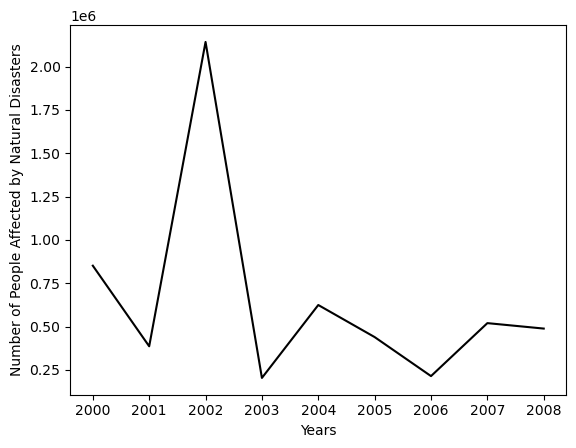

In [ ]:
ax = sns.lineplot(data=df_natural_disasters, x=df_natural_disasters["index"], y=df_natural_disasters[4], color="black")
ax.set(xlabel="Years", ylabel="Number of People Affected by Natural Disasters")

We created a seperate dataframe 'df_global_emissions', to get the column statistic for the rising global temperatures measured by total Co2 emissions.

In [ ]:
df_global_emissions = df_all_combined_nocountry_grouped[df_all_combined_nocountry_grouped["Statistic"] == "CO2 emissions, total (KtCO2)"]
df_global_emissions = df_global_emissions.drop(columns=["Statistic"]).T.reset_index()
df_global_emissions

Plotted below is the rate of CO2 emissions across the years (2000-2008)we are analyzing for

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'CO2 Levels')]

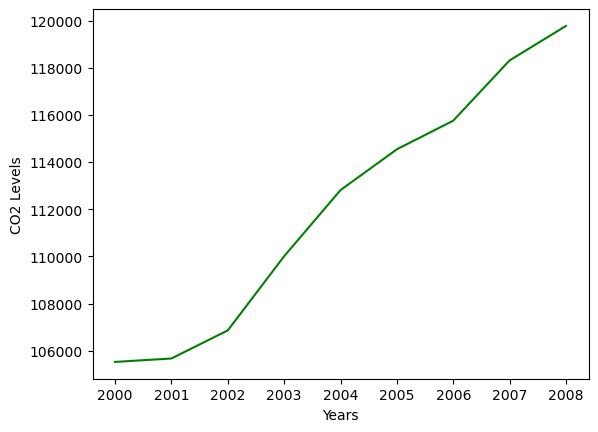

In [ ]:
ax = sns.lineplot(data=df_global_emissions, x=df_global_emissions["index"], y=df_global_emissions[0], color="green")
ax.set(xlabel="Years", ylabel="CO2 Levels")

## Normalize Dataset Values

For the datasets (df_natural_disasters, df_global_emissions), we normalized the data so the range across all datasets will be from 0-100.

In [ ]:
df_natural_disasters[4] = 100 * (df_natural_disasters[4] - df_natural_disasters[4].min()) / (df_natural_disasters[4].max() - df_natural_disasters[4].min())
df_natural_disasters

In [ ]:
df_global_emissions[0] = 100 * (df_global_emissions[0] - df_global_emissions[0].min()) / (df_global_emissions[0].max() - df_global_emissions[0].min())
df_global_emissions

## Comparison

Plotted below is the rate of natural disasters, as well as the rate of CO2 emission across the years we are looking at in our analysis.

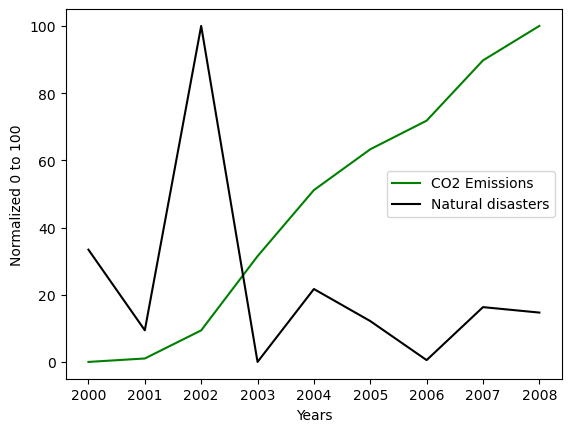

In [ ]:
fig,ax2 = plt.subplots()
plt.plot(df_global_emissions["index"], df_global_emissions[0], label = "CO2 Emissions",color = 'green')
plt.plot(df_natural_disasters["index"], df_natural_disasters[4], label = "Natural disasters",color = 'black')
ax2.set(xlabel="Years", ylabel="Normalized 0 to 100")
plt.legend()

We created a dataframe 'result5', that merges both df_homeless and df_global_emissions to be put into a linear regression model comparing the two.

In [ ]:
result5 = pd.merge(df_homeless,df_global_emissions)
result5.rename({3:"homeless",0:"globalemissions"},axis =1, inplace=True)
result5

To begin our analysis we will first plot the relationship between our two variables of interest then we will use linear regression to determine the affects of people left homeless by natural disasters for Co2 emissions

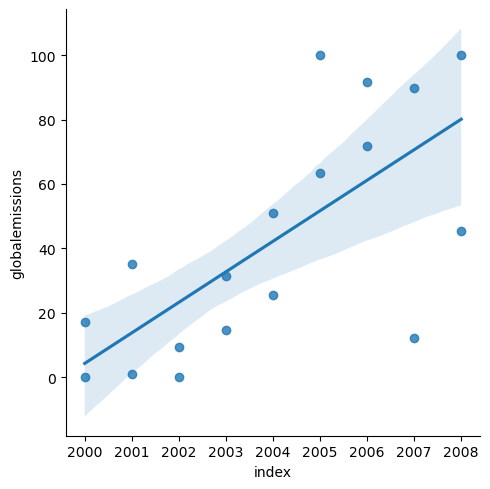

In [ ]:
temp_df = result5.copy().melt(id_vars="index", var_name="homeless", value_name="globalemissions")
temp_df["index"] = pd.to_numeric(temp_df["index"])
temp_df
sns.lmplot(data=temp_df, x="index", y="globalemissions")

The linear regression model below compares number of people left homeless by natural disasters and rising global temperatures.

In [ ]:
outcome_5, predictors_5 = patsy.dmatrices('homeless ~ globalemissions', result5)

mod_5 = sm.OLS(outcome_5, predictors_5)

res_5 = mod_5.fit()

print(res_5.summary())

                            OLS Regression Results                            
Dep. Variable:               homeless   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1.488
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.262
Time:                        17:55:12   Log-Likelihood:                -43.471
No. Observations:                   9   AIC:                             90.94
Df Residuals:                       7   BIC:                             91.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.8499     18.768     

The approach we used to determine this analysis is to first plot out line graphs to visualize our data's relation to each other. And then we used OLS regression to do a detailed analysis of each relationships to answer our questions above.

As we can see with the OLS results for global emission increase compared with number of people left homeless after natural disasters, we can see that the p-value is 0.262 with the slope being 0.39.

Based on significant level = 0.05, accept the null hypthesis.

As we can see from the slope it does have a slight positive correlation but with the R-squared value bieng 0.058 which is very much less than 1 the correlation is not as confirmed.

# Ethics and Privacy

The datasets we utilized and analyzed are publicly available and do not include any personal information. As the datasets were clasified by country code and purely statistical with no names being used, there should be no privacy concern of the data used.

Informed Consent:
* It is country-based data, so informed consent is not needed, as the data was collected from a country-wide government agency and available to the public.

Collection Bias:
* We can not say if there is a collection bias, as the data collected was based on public data from each country included in the datasets.

Unintentional Use:
* People could use the dataset as an excuse to deem  that a global warming rate is due to certain world parts being responsible for a global warming rate and other world parts not.  

In terms of data privacy for our analysis we don't think there are any issues with the datasets as there is no personal information that could link names to the dataset. For potential ethical concerns regarding our analysis due to potential biases with our datasets we did not do a comparison between country codes, but looked at the global rates amongst all countries. We handled these ethical concerns by being as unbiased as possible in the data associated to each country.

# Conclusion & Discussion


Our research question aimed to ask what correlations (if any) exist between rising global temperaturs and rate of people affected by natural disasters and left homeless. From this we wanted to see what correlations (if any) had a relationship with the number of suicides amongst men and women.

We aimed to see if the correlations are solely due to global temperatures or is global temperatures causing more people to be affected by natural disasters thus increasing the number of suicides? How does that differ between men and women?

Our data compiled the rates from multiple global countries and we hypothesized that the rise of global temperature would have an affect on suicide rates due to the amount of people affected by natural disasters.

As we can see with the OLS results for rising global temperatures compared with number of people left homeless after natural disasters, we can see that the p-value is 0.262 with the slope being 0.3907.
* Based on significant level = 0.05, accept the null hypthesis.

As we can see there seems to be a slight positive slope so we can relatively say that as the global temperatures rises the number of people left homeless by natural disasters also rises as well.

This answers our last question which is "Is this solely due to global temperatures or is global temperatures causing more people to be affected by natural disasters thus increasing the number of suicides? How does that differ between men and women?". As we can see with this OLS regression results and the previous OLS regression results there seem to be an inverse relationship between male and female suicide rates when compared to rising global temperatures and number of people left homeless by natural disasters.

We can also see that the r-squared value is closer to 1 as we look at the relationship between male and female suicide rates compared to rising global temperature's OLS results, which means that rising global temperatures has a greater affect on the decrease in suicide rates amongst men and women but in both scenarios there seems to be no difference between men and women in its affects.

# Team Contributions

Aung 
- Found suicide rates and natural disasters used datasets in the analysis
- Helped with data cleaning as well by trying to debug when errors arose
- Worked on data analysis by creating the graphs and writing the regresssion and conclusion for Natural disaster vs Global Temperatures section
- Wrote up the overview and hypothesis section in the final report

Ojeen 

-  Explored datasets for our analysis
-  Worked on data cleaning
-  Helped rewriting the project proposal.
-  Helped plot the graphs in our EDA checkpoint 

Hyunmin
- I found the datasetabout global temperature 
- Helped to clean datasets
- Helped to edit and plot graph
- Helped to edit the ethics/privacy

Anthony
- Wrote functions that cleaned the datasets 
- Worked on data analysis by creating the graphs and writing the regressiona and conclusion for Suicide Rates vs Global Temperatures section
- Wrote up majority of the graphs in the data analysis portion

Tina
- Wrotewritten portions of project (descriptions, conclusion, ethics/privacy, discussion)
- Generated linear regression graphs
- Worked on data cleaning for datasets